# rdkit 分子读取

In [1]:
from rdkit import Chem

## 读SMILES/SMARTS

In [2]:
m = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
m

In [3]:
m = Chem.MolFromSmarts('Cc1ccccc1')
m

## 文件批量读取

从`.csv`批量读取：`SmilesMolSupplier(data, delimiter, smilesColumn, nameColumn, titleLine, sanitize)`       
`data`：数据文件                    
`delimiter`：分隔符，默认为’ ’                           
`smilesColumn`：SMILES所在列，默认为0                    
`nameColumn`：SMILES名称所在列，默认为1                
`titleLine`：是否含有标题行，默认True                      
`sanitize`：是否检查正确性，默认True                       


In [4]:
suppl = Chem.SmilesMolSupplier(data="./data/batch.csv", delimiter=",")
smiles = [Chem.MolToSmiles(m) for m in suppl]
print(smiles)

['C1=CC=CC=CC=C1', 'c1ccccc1', 'c1ccoc1']


从文本批量读取：`SmilesMolSupplierFromText()`                 
参数基本同上

In [12]:
with open("./data/batch.csv", "r", encoding="utf-8") as f:
    content = f.read()
suppl = Chem.SmilesMolSupplierFromText(text=content, delimiter=",")
smiles = [Chem.MolToSmiles(m) for m in suppl]
print(smiles)

['C1=CC=CC=CC=C1', 'c1ccccc1', 'c1ccoc1']


DataFrame批量读取     

读取DataFrame中的SMILES：`AddMoleculeColumnToFrame(frame, smilesCol, molCol, includeFingerprints)`              
`frame`：DataFrame对象                          
`smilesCol`：SMILES所在列                            
`molCol`：新列名，将存放产生的rdkit mol对象                
`includeFingerprints`：是否生成指纹                    


In [13]:
from rdkit.Chem import PandasTools
import pandas as pd

In [19]:
df = pd.read_csv('./data/batch.csv')
df

,SMILES,Name
0,C1=CC=CC=CC=C1,0
1,c1ccccc1,1
2,c1cocc1,2


In [20]:
PandasTools.AddMoleculeColumnToFrame?

Signature:
PandasTools.AddMoleculeColumnToFrame(
    frame,
    smilesCol='Smiles',
    molCol='ROMol',
    includeFingerprints=False,
)
Docstring:
Converts the molecules contains in "smilesCol" to RDKit molecules and appends them to the
dataframe "frame" using the specified column name.
If desired, a fingerprint can be computed and stored with the molecule objects to accelerate
substructure matching
File:      ~/anaconda3/envs/gnn/lib/python3.8/site-packages/rdkit/Chem/PandasTools.py
Type:      function


In [21]:
PandasTools.AddMoleculeColumnToFrame(frame=df,smilesCol='SMILES', molCol='mol' ,includeFingerprints=True)

,SMILES,Name,mol
0,C1=CC=CC=CC=C1,0,
1,c1ccccc1,1,
2,c1cocc1,2,

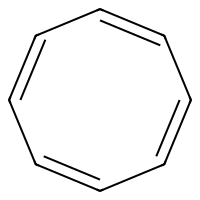
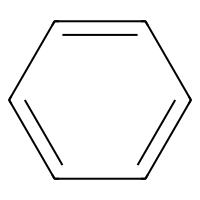
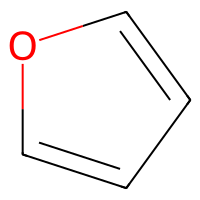

In [22]:
df

下面我们可以计算分子的质量

,SMILES,Name,mol,MW
0,C1=CC=CC=CC=C1,0,,104.152
1,c1ccccc1,1,,78.114
2,c1cocc1,2,,68.075

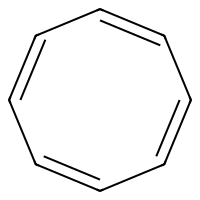
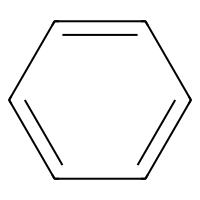
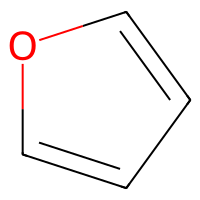

In [23]:
from rdkit.Chem import Descriptors

df["MW"] = df["mol"].apply(Descriptors.MolWt)
df

从`.sdf`里批量读取：`SDMolSupplier(fileName, sanitize, removeHs, strictParsing)`                
`fileName`：文件名                
`sanitize`：检查化合价，计算芳香性、共轭、杂化、kekule，默认True              
`removeHs`：是否隐藏氢原子，默认True                    
`strictParsing`：是否使用严格模式进行解析，默认True                

In [25]:
from rdkit.Chem import SDMolSupplier
SDMolSupplier?

Docstring:     
A class which supplies molecules from an SD file.

Usage examples:

  1) Lazy evaluation: the molecules are not constructed until we ask for them:

     >>> suppl = SDMolSupplier('in.sdf')
     >>> for mol in suppl:
     ...    mol.GetNumAtoms()

  2) Lazy evaluation 2:

     >>> suppl = SDMolSupplier('in.sdf')
     >>> mol1 = next(suppl)
     >>> mol2 = next(suppl)
     >>> suppl.reset()
     >>> mol3 = next(suppl)
     # mol3 and mol1 are the same:
     >>> MolToSmiles(mol3)==MolToSmiles(mol1)

  3) Random Access:

     >>> suppl = SDMolSupplier('in.sdf')
     >>> mol1 = suppl[0] 
     >>> mol2 = suppl[1] 
     # NOTE: this will generate an IndexError if the supplier doesn't have that many
     molecules.

  4) Random Access 2:  looping over all molecules 

     >>> suppl = SDMolSupplier('in.sdf')
     >>> nMols = len(suppl)
     >>> for i in range(nMols):
     ...   suppl[i].GetNumAtoms()

Properties in the SD file are used to set properties on each molecule.
The pro

In [24]:

suppl = SDMolSupplier("./data/batch.sdf")
smiles = [Chem.MolToSmiles(m) for m in suppl]
print(smiles)

['C1=CC=CC=CC=C1', 'c1ccccc1', 'c1ccoc1']


从压缩包file object/.gz里读取

In [26]:
import gzip
gz_file = gzip.open("./data/batch.sdf.gz", "r")
suppl = Chem.ForwardSDMolSupplier(gz_file)
smiles = [Chem.MolToSmiles(m) for m in suppl]
print(smiles)

['C1=CC=CC=CC=C1', 'c1ccccc1', 'c1ccoc1']


## 读.mol
从`.mol`里读取：`MolFromMolFile(fileName, sanitize, removeHs, strictParsing)`


In [29]:
m = Chem.MolFromMolFile('./data/single.mol')
m

## 读.mol2
不推荐，容易出bug：`MolFromMol2File(…)`

In [35]:
m = Chem.MolFromMol2File('data/batch.mol2')
print(Chem.MolToSmiles(m))


[C]1=[C][C]=[C][C]=[C][C]=[C]1


## 读取pdb

In [37]:
mol = Chem.MolFromPDBFile("./data/single.pdb")
print(Chem.MolToSmiles(mol))

C1=CC=CC=CC=C1


In [38]:
mol =Chem.MolFromPDBBlock("""COMPND    UNNAMED
AUTHOR    GENERATED BY OPEN BABEL 3.1.1
HETATM    1  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    2  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    3  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    4  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    5  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    6  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    7  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    8  C   UNL     1       0.000   0.000   0.000  1.00  0.00           C  
CONECT    1    8    2    2                                            
CONECT    2    1    1    3                                            
CONECT    3    2    4    4                                            
CONECT    4    3    3    5                                            
CONECT    5    4    6    6                                            
CONECT    6    5    5    7                                            
CONECT    7    6    8    8                                            
CONECT    8    7    7    1                                            
MASTER        0    0    0    0    0    0    0    0    8    0    8    0
END""")
print(Chem.MolToSmiles(mol))

C1=CC=CC=CC=C1


## 读取fasta序列


In [47]:
mol = Chem.MolFromFASTA(""">3CA7_1|Chain A|Protein spitz|Drosophila melanogaster (7227)
TFPTYKCPETFDAWYCLNDAHCFAVKIADLPVYSCECAIGFMGQRCEYKEID""")
mol

In [48]:
mol = Chem.MolFromSequence("TFPTYKCPETFDAWYCLNDAHCFAVKIADLPVYSCECAIGFMGQRCEYKEID")
mol

In [ ]:
## 读取Inchi

In [50]:
mol = Chem.MolFromInchi("InChI=1S/C8H10O/c1-7(9)8-5-3-2-4-6-8/h2-7,9H,1H3/t7-/m0/s1")
print(Chem.MolToSmiles(mol))

C[C@H](O)c1ccccc1
